# 4.10 Coding Etiquette & Excel Reporting - Part 1, Step 6-8

## List of Contents:
### 01. Import data and libraries
### 02. Create Sample
### 03. Profile Distribution Visualisation
### 04. Descriptive Analyse of Customer Profiles
### 05. Regions and Department Analysis

# 01. Import data and libraries

In [86]:
# Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [85]:
# Create path

path=r'/Users/nikolinastekovic/Library/CloudStorage/OneDrive-Personal/CF DATA ANALYICS/Immerse/4-Python/Instacart Basket Analysis'

In [4]:
# Import dataframe from pt. 1, step 5

instacard_basket_profiles = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacard_basket_profiles.pkl'))

Note:  This dataset is focused only on High-activity customers, activity being based on the number of orders

# 02. Create Sample

In order to generate visualisations faster, I will work with smaller sample created from the dataset

In [5]:
# create a random sample

np.random.seed(4)
dev = np.random.rand(len(instacard_basket_profiles)) <= 0.7

In [6]:
# create dataframe big and small

big = instacard_basket_profiles[dev]
small = instacard_basket_profiles[~dev]

In [7]:
# check - sum of rows
len(big)+len(small)

30964564

In [8]:
# check - length of table
len(instacard_basket_profiles)

30964564

In [9]:
instacard_basket_profiles.head()

,order_id,user_id,order_number,Day_of_order,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,marital_status,income,region,customer_activity,age_group,income_class,department,department_group,household_size,customer profile
0,2539329,1,1,2,8,NaN,True,196,1,0,...,married,40423,South,high_activity,Adult,Middle Income,beverages,Food,Big Household,Married Couple w/ Children
1,2398795,1,2,3,7,15.0,False,196,1,1,...,married,40423,South,high_activity,Adult,Middle Income,beverages,Food,Big Household,Married Couple w/ Children
2,473747,1,3,3,12,21.0,False,196,1,1,...,married,40423,South,high_activity,Adult,Middle Income,beverages,Food,Big Household,Married Couple w/ Children
3,2254736,1,4,4,7,29.0,False,196,1,1,...,married,40423,South,high_activity,Adult,Middle Income,beverages,Food,Big Household,Married Couple w/ Children
4,431534,1,5,4,15,28.0,False,196,1,1,...,married,40423,South,high_activity,Adult,Middle Income,beverages,Food,Big Household,Married Couple w/ Children


# 03. Profile Distribution Visualisation

Text(0, 0.5, 'Customer Profile')

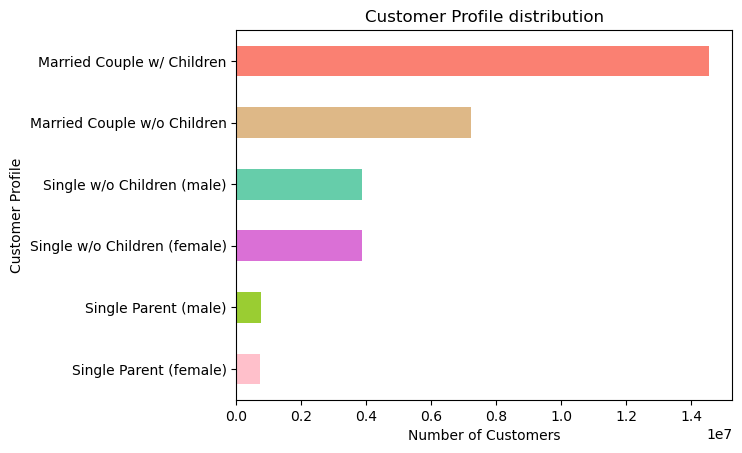

In [80]:
# Bar chart of distribution of profiles

bar_cust_profile = instacard_basket_profiles['customer profile'].value_counts().sort_values(ascending=True).plot.barh(color=['pink','yellowgreen', 'orchid','mediumaquamarine','burlywood', 'salmon'])
plt.title("Customer Profile distribution")
plt.xlabel("Number of Customers")
plt.ylabel("Customer Profile")

In [88]:
bar_cust_profile.figure.savefig(os.path.join( path, '04 Analysis','Visualizations', 'bar_cust_profile.png'))

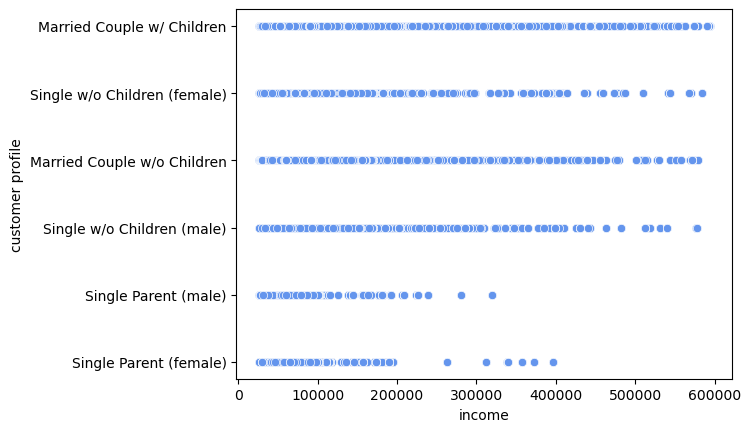

In [82]:
# Scatter bar showing income of each customer profile 

scatter_plot_profile = sns.scatterplot(x = 'income', y = 'customer profile', color='cornflowerblue', data = small)

In [89]:
scatter_plot_profile.figure.savefig(os.path.join( path, '04 Analysis','Visualizations', 'scatter_plot_profile.png'))

#### Married couples fall into a group that makles the biggest number of customers. It is also the group with highest income. Single parents make the smallest group of customers, and also the one with lowest income.

# 04. Descriptive Analyse of Customer Profiles

In [20]:
# Aggregate the max, mean, and min variables on a customer-profile level for usage frequency

instacard_basket_profiles.groupby('customer profile').agg({'order_number':['min', 'mean', 'max', 'sum']})

order_number                          
                                      min       mean max        sum
customer profile                                                   
Married Couple w/ Children              1  17.793478  99  258586392
Married Couple w/o Children             1  17.749022  99  127989280
Single Parent (female)                  1  18.047580  99   13058796
Single Parent (male)                    1  17.955947  99   13603354
Single w/o Children (female)            1  18.102320  99   69843873
Single w/o Children (male)              1  17.814385  99   69144717

In [21]:
# Aggregate the max, mean, and min variables on a customer-profile level for expenditure

instacard_basket_profiles.groupby('customer profile').agg({'prices':['min', 'mean', 'max', 'sum']})

prices                                 
                                min       mean      max          sum
customer profile                                                    
Married Couple w/ Children      1.0  12.102113  99999.0  175875767.6
Married Couple w/o Children     1.0  11.626527  99999.0   83839597.2
Single Parent (female)          1.0  12.214567  99999.0    8838167.4
Single Parent (male)            1.0   9.625240  99999.0    7292043.7
Single w/o Children (female)    1.0  11.664725  99999.0   45005810.1
Single w/o Children (male)      1.0  12.537981  99999.0   48664895.6

In [19]:
# Aggregate the max, mean, and min variables on a household size level for usage frequency

instacard_basket_profiles.groupby('household_size').agg({'order_number':['min', 'mean', 'max', 'sum']})

order_number                          
                             min       mean max        sum
household_size                                            
Big Household                  1  17.837412  99  138641574
One-person houshold            1  17.957922  99  138988590
Small Houshold                 1  17.770497  99  274596248

In [22]:
# Aggregate the max, mean, and min variables on a household_size level for expenditure

instacard_basket_profiles.groupby('household_size').agg({'prices':['min', 'mean', 'max', 'sum']})

prices                                 
                       min       mean      max          sum
household_size                                             
Big Household          1.0  11.791609  99999.0   91650471.5
One-person houshold    1.0  12.102657  99999.0   93670705.7
Small Houshold         1.0  11.920187  99999.0  184195104.4

# 05. Regions and Department Analysis

## Region

Text(0, 0.5, 'Number of Customers')

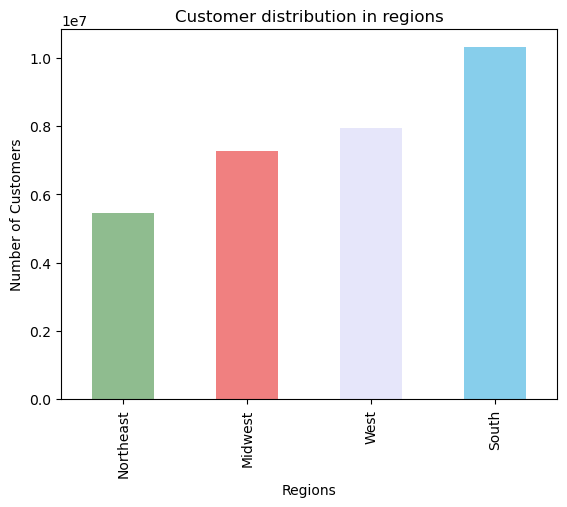

In [102]:
# Bar chart of customer distribution in regions

bar_cust_region = instacard_basket_profiles['region'].value_counts().sort_values(ascending=True).plot.bar(color=['darkseagreen','lightcoral','lavender', 'skyblue'])
plt.title("Customer distribution in regions")
plt.xlabel("Regions")
plt.ylabel("Number of Customers")

In [103]:
bar_cust_region.figure.savefig(os.path.join( path, '04 Analysis','Visualizations', 'bar_cust_region.png'))

In [35]:
# Group by "customer profile" and "region" columns

cust_profile_region = instacard_basket_profiles.groupby(['customer profile', 'region']).size().unstack()

In [41]:
# Create Subset

cust_profile_region = cust_profile_region.loc[cust_profile_region.sum(axis=1).sort_values(ascending=True).index]


Text(0, 0.5, 'Number of Customers')

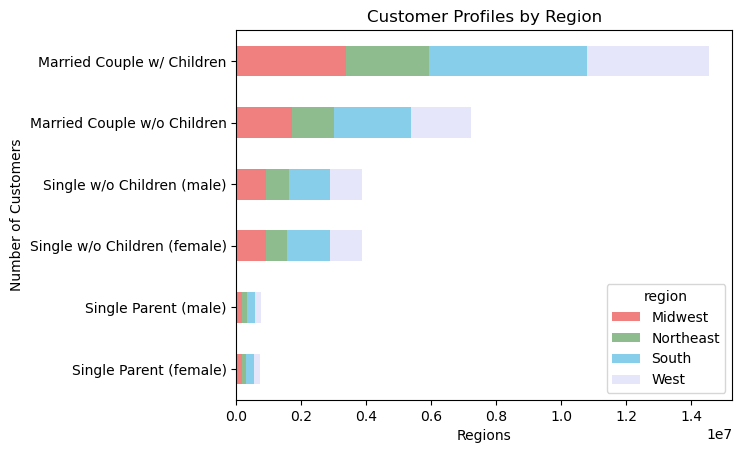

In [79]:
# Create bar chart

bar_cust_prof_region = cust_profile_region.plot.barh(stacked = True, color=['lightcoral', 'darkseagreen','skyblue','lavender'])
plt.title("Customer Profiles by Region")
plt.xlabel("Regions")
plt.ylabel("Number of Customers")

In [92]:
bar_cust_prof_region.figure.savefig(os.path.join( path, '04 Analysis','Visualizations', 'bar_cust_prof_region.png'))

In [101]:
# Create a crosstab to analyze the relationship between 'Gender' and 'Region'
cross_tab_cust_prof_region = pd.crosstab(instacard_basket_profiles['customer profile'], instacard_basket_profiles['region'], dropna=False)

# Display the crosstab
cross_tab_cust_prof_region

region,Midwest,Northeast,South,West
customer profile,,,,
Married Couple w/ Children,3367591,2564228,4854839,3745992
Married Couple w/o Children,1719671,1289545,2368910,1832935
Single Parent (female),171913,118687,254123,178853
Single Parent (male),179522,137743,251334,188997
Single w/o Children (female),905542,663656,1314256,974829
Single w/o Children (male),917274,690826,1267677,1005621


In [100]:
# Create a crosstab to analyze the relationship between 'Gender' and 'Region'
cross_tab_cust_prof_household = pd.crosstab(instacard_basket_profiles['household_size'], instacard_basket_profiles['region'], dropna=False)

# Display the crosstab
cross_tab_cust_prof_household

region,Midwest,Northeast,South,West
household_size,,,,
Big Household,1787286,1381233,2585864,2018133
One-person houshold,1822816,1354482,2581933,1980450
Small Houshold,3651411,2728970,5143342,3928644


#### The region with the highest frequency of orders is the South and the region with the lowest frequency of orders is the Northeast.  Dividing customer profiles across the regions has the same rati in all 4. In all 4 regeions, One-peron household make for the least orders, while Bih household for the most.

## Department

In [54]:
# Grouping the records by department name to see the order count for departments

instacard_depart=instacard_basket_profiles.groupby(['department'])['order_id'].agg('nunique').sort_values(ascending=False).rename_axis('department').reset_index(name='order_count')

In [52]:
instacard_depart

,department,order_count
0,produce,2303683
1,dairy eggs,2080172
2,beverages,1391504
3,snacks,1330617
4,frozen,1123774
5,pantry,1064676
6,bakery,839208
7,deli,735224
8,canned goods,647047
9,dry goods pasta,568596


In [59]:
# Grouping the records by department name to see the order count for each group

instacard_depart_group=instacard_basket_profiles.groupby(['department_group'])['order_id'].agg('nunique').sort_values(ascending=False).rename_axis('department_group').reset_index(name='order_count')

In [60]:
instacard_depart_group

,department_group,order_count
0,Food,3028416
1,Household_and_Personal,798511
2,Other,389191


Text(0, 0.5, 'Groups')

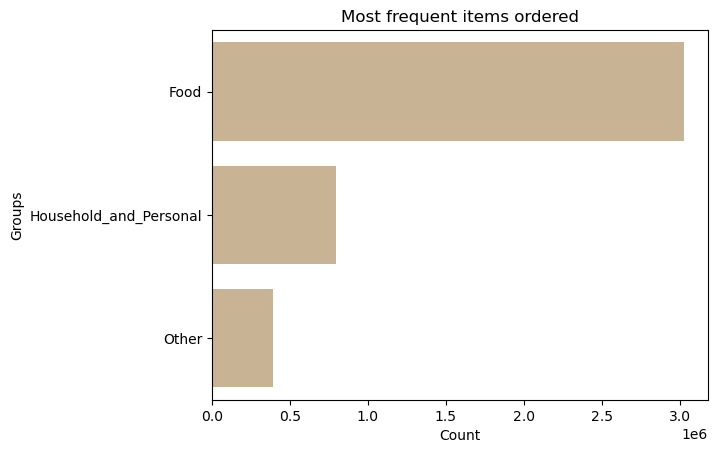

In [96]:
# Bar chart of items in department groups

bar_dept_groups = sns.barplot(x='order_count', y='department_group', data=instacard_depart_group, color= 'tan')

plt.title("Most frequent items ordered")
plt.xlabel("Count")
plt.ylabel("Groups")

In [97]:
bar_dept_groups.figure.savefig(os.path.join( path, '04 Analysis','Visualizations', 'bar_dept_groups.png'))

In [72]:
# Group by "customer profile" and "department_group'

cust_profile_dept = instacard_basket_profiles.groupby(['customer profile', 'department_group']).size().unstack()

In [73]:
# Create Subset

cust_profile_dept = cust_profile_dept.loc[cust_profile_dept.sum(axis=1).sort_values(ascending=True).index]


Text(0, 0.5, 'Customer Profile')

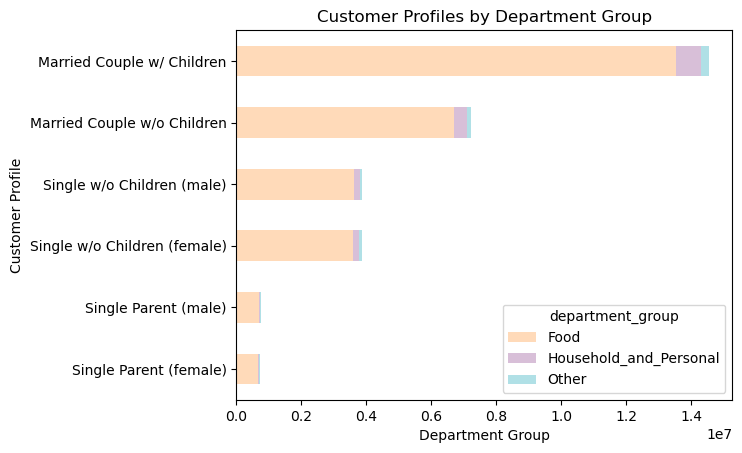

In [95]:
# Create bar chart

bar_cust_prof_dept = cust_profile_dept.plot.barh(stacked = True, color=['peachpuff', 'thistle','powderblue'])
plt.title("Customer Profiles by Department Group")
plt.xlabel("Department Group")
plt.ylabel("Customer Profile")

In [104]:
bar_cust_prof_dept.figure.savefig(os.path.join( path, '04 Analysis','Visualizations', 'bar_cust_prof_dept.png'))

#### For simplicity of the overview, the departments were grouped in bigger entities. We can see that  the group 'Food'  is in higest demand, and group 'Other' in lowest.